In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns
pd.set_option('display.max_columns', None) # allows to see all columns 


In [5]:
chantiers = pd.read_csv('/Users/theob/Desktop/BCGx Hackathon/data/chantiers-a-paris.csv', delimiter = ';') # do we want older or more recent data ?
chantiers_pertu = pd.read_csv('/Users/theob/Desktop/BCGx Hackathon/data/chantiers-perturbants.csv', delimiter = ';') # do we want older or more recent data ?
traffic = pd.read_csv('/Users/theob/Desktop/BCGx Hackathon/data/comptages-routiers-permanents.csv', delimiter = ';') # do we want older or more recent data ?
calendar = pd.read_csv('/Users/theob/Desktop/BCGx Hackathon/data/dimdate-QueryResult.csv', delimiter = ',') # do we want older or more recent data ?
holidays = pd.read_csv('/Users/theob/Desktop/BCGx Hackathon/data/fr-en-calendrier-scolaire.csv', delimiter = ';') # do we want older or more recent data ?
weather = pd.read_csv('/Users/theob/Desktop/BCGx Hackathon/data/donnees-synop-essentielles-omm.csv', delimiter = ';') # do we want older or more recent data ?
markets = pd.read_csv('/Users/theob/Desktop/BCGx Hackathon/data/marches-decouverts.csv', delimiter = ';') # do we want older or more recent data ?
events = pd.read_csv('/Users/theob/Desktop/BCGx Hackathon/data/que-faire-a-paris-.csv', delimiter = ';') # do we want older or more recent data ?
touristic_zones = pd.read_csv('/Users/theob/Desktop/BCGx Hackathon/data/zones-touristiques-internationales.csv', delimiter = ';') # do we want older or more recent data ?


In [6]:
chantiers = chantiers[['Code postal arrondissement - Commune',
                                   'Date début du chantier', 
                                   'Date fin du chantier',
                                   'Synthèse - Nature du chantier',
                                   'Encombrement espace public',]]

chantiers_pertu = chantiers_pertu[["Code postal de l'arrondissement", 
                                                "Typologie",  
                                                'Objet', 
                                                'Voie(s)',  
                                                'Date de début', 
                                                'Date de fin', 
                                                'Impact sur la circulation', 
                                                'Niveau de perturbation',
                                                'Statut',]]


calendar = calendar[['word_date', 
                     'date', 
                     'year', 
                     'quarter', 
                     'month',
                     'yearmonth', 
                     'day_of_month', 
                     'week', 
                     'day_of_week', 
                     'weekday',
                     'month_and_year', 
                     'holiday']]

holidays = holidays[['Description', 
                     'Population', 
                     'Date de début', 
                     'Date de fin',
                     'Académies', 
                     'Zones', 
                     'annee_scolaire']]

weather = weather[["Date", 
                    "Pression station",
                    "Vitesse du vent moyen 10 mn",
                    'Nebulosité totale', 
                    "Température (°C)", 
                    "Humidité", 
                    'Précipitations dans la dernière heure'
                   ]]



markets = markets[['Nom court', 
                   'Localisation',
                  'Produit',
                   'Arrondissement', 
                   'Jours de tenue', 
                   'LUNDI', 
                   'MARDI',
                   'MERCREDI', 
                   'JEUDI', 
                   'VENDREDI', 
                   'SAMEDI', 
                   'DIMANCHE', 
                   'Secteur',
                   'Heure début en semaine',
                   'Heure fin en semaine', 
                   'Heure début le samedi', 
                   'Heure fin le samedi',
                   'Heure début le dimanche', 
                   'Heure fin le dimanche']]


events = events[['Date de début',
                 'Date de fin',
                 'Mots clés',  
                 'Adresse du lieu', 
                 'Ville']]

touristic_zones = touristic_zones[['name', 'type', '@timestamp']]

In [7]:
amont = traffic[traffic["Libelle noeud amont"].isin(['Av_Champs_Elysees-Washington', "Convention-Blomet", "Sts_Peres-Voltaire"])]
aval_amont = amont[amont["Libelle noeud aval"].isin(['Av_Champs_Elysees-Berri', "Lecourbe-Convention", "Sts_Peres-Universite"]) ]

In [8]:

aval_amont["date"] = pd.to_datetime(aval_amont["Date et heure de comptage"], utc=True)
aval_amont["date"] = aval_amont["date"].dt.strftime('%Y-%m-%dT%H:%M')

/var/folders/dj/drqjc_c134xgs5ns31syhsm40000gn/T/ipykernel_78897/959722758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aval_amont["date"] = pd.to_datetime(aval_amont["Date et heure de comptage"], utc=True)
/var/folders/dj/drqjc_c134xgs5ns31syhsm40000gn/T/ipykernel_78897/959722758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aval_amont["date"] = aval_amont["date"].dt.strftime('%Y-%m-%dT%H:%M')


In [9]:
amont['Libelle noeud aval'].drop_duplicates()

7953      Av_Champs_Elysees-Berri
8058     Av_Champs_Elysees-Balzac
9434          Pt_Carrousel_Gauche
9790         Sts_Peres-Universite
10333        Convention-Vaugirard
14238         Lecourbe-Convention
Name: Libelle noeud aval, dtype: object

In [10]:
#435 nulls
aval_amont[aval_amont[["Débit horaire", "Taux d'occupation"]].isna().any(axis=1)]

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,date
43707,5672,Convention,2023-02-08T13:00:00+01:00,NaN,NaN,Inconnu,2973,Convention-Blomet,2937,Lecourbe-Convention,Invalide,2005-01-01,2019-06-01,"48.838664768841056, 2.2932859242574652","{""coordinates"": [[2.2945792503760125, 48.83806...",2023-02-08T12:00
124072,4264,AV_Champs_Elysees,2023-11-06T09:00:00+01:00,NaN,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177...",2023-11-06T08:00
221229,4264,AV_Champs_Elysees,2022-11-08T10:00:00+01:00,NaN,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605, 2.3017227924560624","{""coordinates"": [[2.300995147533877, 48.871777...",2022-11-08T09:00
343779,5672,Convention,2023-11-06T08:00:00+01:00,NaN,NaN,Inconnu,2973,Convention-Blomet,2937,Lecourbe-Convention,Invalide,1997-01-20,2023-01-01,"48.838664768841056, 2.2932859242574652","{""coordinates"": [[2.2945792503760125, 48.83806...",2023-11-06T07:00
439182,191,Sts_Peres,2023-02-02T12:00:00+01:00,NaN,NaN,Inconnu,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,2005-01-01,2019-06-01,"48.85728037029828, 2.332454190717672","{""coordinates"": [[2.3332577811223216, 48.85826...",2023-02-02T11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21319851,191,Sts_Peres,2023-11-23T13:00:00+01:00,NaN,NaN,Inconnu,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,1996-10-03,2023-01-01,"48.85728037029828, 2.332454190717672","{""coordinates"": [[2.3332577811223216, 48.85826...",2023-11-23T12:00
21319877,191,Sts_Peres,2023-11-23T12:00:00+01:00,NaN,NaN,Inconnu,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,1996-10-03,2023-01-01,"48.85728037029828, 2.332454190717672","{""coordinates"": [[2.3332577811223216, 48.85826...",2023-11-23T11:00
21460114,4264,AV_Champs_Elysees,2023-03-22T12:00:00+01:00,NaN,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177...",2023-03-22T11:00
21460138,4264,AV_Champs_Elysees,2023-03-22T11:00:00+01:00,NaN,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177...",2023-03-22T10:00


In [11]:
aval_amont['Libelle'].drop_duplicates()

7953     AV_Champs_Elysees
9790             Sts_Peres
14238           Convention
Name: Libelle, dtype: object

In [12]:
champs = aval_amont[aval_amont['Libelle'] == "AV_Champs_Elysees"].sort_values(by=["Date et heure de comptage"], ascending=True)
conv =  aval_amont[aval_amont['Libelle'] == "Conventions"].sort_values(by=["Date et heure de comptage"], ascending=True)
sts = aval_amont[aval_amont['Libelle'] == "Sts_Peres"].sort_values(by=["Date et heure de comptage"], ascending=True)

In [13]:
champs = champs[['Date et heure de comptage', 'Débit horaire', "Taux d'occupation"]]
conv = conv[['Date et heure de comptage', 'Débit horaire', "Taux d'occupation"]]
sts = sts[['Date et heure de comptage', 'Débit horaire', "Taux d'occupation"]]



In [14]:
(champs.isna().sum()/champs.shape[0]*100).sort_values(ascending = False)

Taux d'occupation            3.196913
Débit horaire                2.990216
Date et heure de comptage    0.000000
dtype: float64

# Translating in English

In [15]:
columns_name={"Date et heure de comptage": "date",
              "Débit horaire": "flow", 
              "Taux d'occupation" : "occupancy_rate"}

In [16]:
champs=champs.rename(columns = columns_name)
conv=conv.rename(columns = columns_name)
sts=sts.rename(columns = columns_name)
champs.tail()

,date,flow,occupancy_rate
535535,2023-12-01T20:00:00+01:00,1430.0,53.45889
532757,2023-12-01T21:00:00+01:00,1480.0,43.57389
532729,2023-12-01T22:00:00+01:00,1421.0,53.80111
532701,2023-12-01T23:00:00+01:00,1410.0,51.92889
532673,2023-12-02T00:00:00+01:00,1323.0,48.92500


<Axes: xlabel='date'>

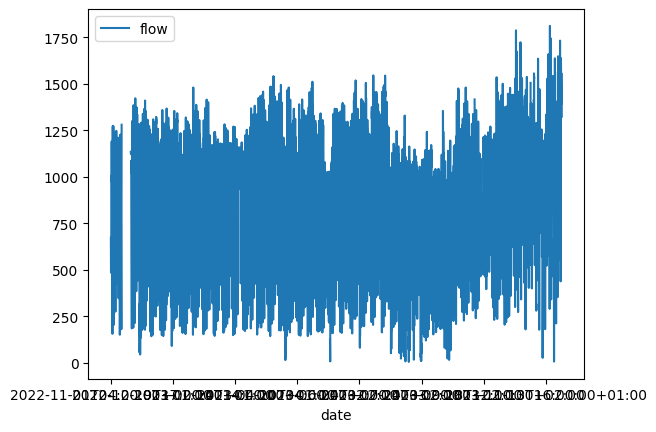

In [17]:
champs.plot(x='date', y='flow')

# Case of Date
We only have the date column, which type is "object". We have 2 things to do :
1. Check if we have missing values in time, and replace them.
2. Extract numerical information (such as month of the year, day etc...)

In [18]:
import dateutil.parser as dparser
## Finding day of year
from datetime import datetime, date

<Axes: xlabel='date'>

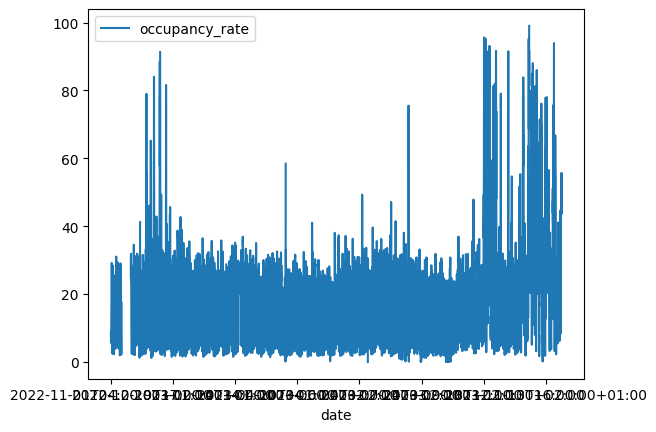

In [19]:
champs.plot(x='date', y= 'occupancy_rate')
# Missing Date

Some days are missing (From 4 to 15 march 2022 for example). If we want to use some lags in the future in this notebook , we need to tackle these missing values. We create an date index that has all ranges , and join with our dataframe. 

Thanks to the adding of all the dates, we can see that some periods are missing values...

# Adding Holidays

In [20]:
holidays = holidays[(holidays['Zones'] == 'Zone C') &  (holidays['annee_scolaire']== '2022-2023') & (holidays['Académies'] == 'Paris')]
holidays =  holidays[['Description', 'Date de début', 'Date de fin']]

In [21]:
holidays.dtypes

Description      object
Date de début    object
Date de fin      object
dtype: object

In [22]:
import pandas as pd
from pandas import to_datetime
from datetime import timedelta

# Supposons que 'df' est votre DataFrame
# df = ...

# Convertir les colonnes de dates en datetime
holidays['Date de début'] = to_datetime(holidays['Date de début'], utc=True)
holidays['Date de fin'] = to_datetime(holidays['Date de fin'], utc=True)

nouvelles_lignes = []

for index, row in holidays.iterrows():
    # Générer une série de dates pour chaque période de vacances
    date_range = pd.date_range(start=row['Date de début'], end=row['Date de fin'], freq='D')
    
    # Créer une nouvelle ligne pour chaque date
    for date in date_range:
        new_row = row.to_dict()
        new_row['Date de début'] = date
        nouvelles_lignes.append(new_row)

# Créer le nouveau DataFrame
process_holiday = pd.DataFrame(nouvelles_lignes)

process_holiday = process_holiday[['Description', 'Date de début']]
process_holiday


,Description,Date de début
0,Vacances de Noël,2022-12-16 23:00:00+00:00
1,Vacances de Noël,2022-12-17 23:00:00+00:00
2,Vacances de Noël,2022-12-18 23:00:00+00:00
3,Vacances de Noël,2022-12-19 23:00:00+00:00
4,Vacances de Noël,2022-12-20 23:00:00+00:00
...,...,...
185,Vacances d'Été,2023-08-27 22:00:00+00:00
186,Vacances d'Été,2023-08-28 22:00:00+00:00
187,Vacances d'Été,2023-08-29 22:00:00+00:00
188,Vacances d'Été,2023-08-30 22:00:00+00:00


In [23]:
process_holiday["month_day"] = pd.to_datetime(process_holiday['Date de début'], utc = True).dt.day
process_holiday["month"] = pd.to_datetime(process_holiday['Date de début'], utc = True).dt.month
process_holiday

,Description,Date de début,month_day,month
0,Vacances de Noël,2022-12-16 23:00:00+00:00,16,12
1,Vacances de Noël,2022-12-17 23:00:00+00:00,17,12
2,Vacances de Noël,2022-12-18 23:00:00+00:00,18,12
3,Vacances de Noël,2022-12-19 23:00:00+00:00,19,12
4,Vacances de Noël,2022-12-20 23:00:00+00:00,20,12
...,...,...,...,...
185,Vacances d'Été,2023-08-27 22:00:00+00:00,27,8
186,Vacances d'Été,2023-08-28 22:00:00+00:00,28,8
187,Vacances d'Été,2023-08-29 22:00:00+00:00,29,8
188,Vacances d'Été,2023-08-30 22:00:00+00:00,30,8


In [24]:
def year_day(date_to_convert):
  #Function that returns the day of the year as an integer
  return  date_to_convert.timetuple().tm_yday

In [25]:
def df_date_preprocessing (df): 

  #Function that extracts information from dates
  
  dataframe = df.copy() #so that we don't change the import

  dataframe["hour"] = pd.to_datetime(dataframe.date, utc = True).dt.hour
  dataframe["month_day"] = pd.to_datetime(dataframe.date, utc = True).dt.day
  dataframe["year_day"] = pd.to_datetime(dataframe.date, utc = True).apply(year_day)
  
  dataframe["week_day"] = pd.to_datetime(dataframe.date, utc = True).dt.weekday
  dataframe["week"] = pd.to_datetime(dataframe.date, utc = True).dt.isocalendar().week
  dataframe["month"] = pd.to_datetime(dataframe.date, utc = True).dt.month

  return dataframe

In [26]:
champs = df_date_preprocessing(champs).sort_values("date")
champs.head()

,date,flow,occupancy_rate,hour,month_day,year_day,week_day,week,month
7269646,2022-11-01T04:00:00+01:00,672.0,8.89223,3,1,305,1,44,11
7269620,2022-11-01T05:00:00+01:00,513.0,7.12889,4,1,305,1,44,11
7269594,2022-11-01T06:00:00+01:00,494.0,6.22500,5,1,305,1,44,11
8589124,2022-11-01T07:00:00+01:00,513.0,5.80723,6,1,305,1,44,11
7269568,2022-11-01T08:00:00+01:00,484.0,5.57111,7,1,305,1,44,11


In [27]:
# Perform the merge, adding a binary column "is_holiday"
champs_with_holidays = champs.merge(process_holiday, on=['month', 'month_day'], how='left')
champs_with_holidays['is_holiday'] = champs_with_holidays['Description'].notna().astype(int)
champs_with_holidays.drop(['Description', 'Date de début'], axis=1, inplace=True)

champs_with_holidays

,date,flow,occupancy_rate,hour,month_day,year_day,week_day,week,month,is_holiday
0,2022-11-01T04:00:00+01:00,672.0,8.89223,3,1,305,1,44,11,1
1,2022-11-01T05:00:00+01:00,513.0,7.12889,4,1,305,1,44,11,1
2,2022-11-01T06:00:00+01:00,494.0,6.22500,5,1,305,1,44,11,1
3,2022-11-01T07:00:00+01:00,513.0,5.80723,6,1,305,1,44,11,1
4,2022-11-01T08:00:00+01:00,484.0,5.57111,7,1,305,1,44,11,1
...,...,...,...,...,...,...,...,...,...,...
8222,2023-12-01T20:00:00+01:00,1430.0,53.45889,19,1,335,4,48,12,0
8223,2023-12-01T21:00:00+01:00,1480.0,43.57389,20,1,335,4,48,12,0
8224,2023-12-01T22:00:00+01:00,1421.0,53.80111,21,1,335,4,48,12,0
8225,2023-12-01T23:00:00+01:00,1410.0,51.92889,22,1,335,4,48,12,0


# Adding Weather

In [28]:
weather

,Date,Pression station,Vitesse du vent moyen 10 mn,Nebulosité totale,Température (°C),Humidité,Précipitations dans la dernière heure
0,2022-02-02T13:00:00+01:00,101520.0,4.9,100.0,10.2,85,0.0
1,2022-02-12T01:00:00+01:00,102240.0,1.1,75.0,1.6,86,0.0
2,2022-02-14T01:00:00+01:00,99090.0,5.0,90.0,10.6,74,0.2
3,2022-02-14T07:00:00+01:00,99250.0,5.2,75.0,7.8,84,0.0
4,2022-02-14T16:00:00+01:00,99470.0,5.1,75.0,9.0,76,0.2
...,...,...,...,...,...,...,...
5572,2023-05-28T11:00:00+02:00,100750.0,3.7,0.0,20.6,55,0.0
5573,2023-06-01T14:00:00+02:00,100810.0,5.3,0.0,25.3,49,0.0
5574,2023-06-07T05:00:00+02:00,100620.0,3.6,NaN,14.8,82,0.0
5575,2023-06-09T20:00:00+02:00,99850.0,5.4,90.0,27.2,43,0.0


In [29]:
weather_df = weather.rename(columns={"Date" : "date",
                            "Nebulosité totale" : "visibility",
                            "Pression station" : 'atm_pressure',
                             "Vitesse du vent moyen 10 mn" : "wind_speed",
                             "Température (°C)" : "temp", 
                             "Humidité" : 'humidity', 
                             "Précipitations dans la dernière heure" : "rain"})

In [30]:
weather_df

,date,atm_pressure,wind_speed,visibility,temp,humidity,rain
0,2022-02-02T13:00:00+01:00,101520.0,4.9,100.0,10.2,85,0.0
1,2022-02-12T01:00:00+01:00,102240.0,1.1,75.0,1.6,86,0.0
2,2022-02-14T01:00:00+01:00,99090.0,5.0,90.0,10.6,74,0.2
3,2022-02-14T07:00:00+01:00,99250.0,5.2,75.0,7.8,84,0.0
4,2022-02-14T16:00:00+01:00,99470.0,5.1,75.0,9.0,76,0.2
...,...,...,...,...,...,...,...
5572,2023-05-28T11:00:00+02:00,100750.0,3.7,0.0,20.6,55,0.0
5573,2023-06-01T14:00:00+02:00,100810.0,5.3,0.0,25.3,49,0.0
5574,2023-06-07T05:00:00+02:00,100620.0,3.6,NaN,14.8,82,0.0
5575,2023-06-09T20:00:00+02:00,99850.0,5.4,90.0,27.2,43,0.0


<Axes: xlabel='visibility', ylabel='Density'>

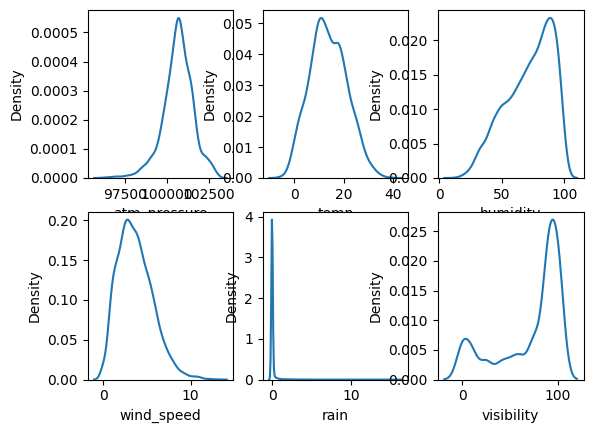

In [31]:
fig = plt.figure()
fig.add_subplot(231)
sns.kdeplot(weather_df.atm_pressure)   #top left
fig.add_subplot(232) 
sns.kdeplot(weather_df.temp)  #top right
fig.add_subplot(233)   #bottom left
sns.kdeplot(weather_df.humidity)
fig.add_subplot(234)   #bottom right 
sns.kdeplot(weather_df.wind_speed)
fig.add_subplot(235)  
sns.kdeplot(weather_df.rain)
fig.add_subplot(236)  
sns.kdeplot(weather_df.visibility)

In [32]:
weather_df= df_date_preprocessing(weather_df).drop(columns = ["hour","month_day",'year_day',"week_day","week", "month", 'visibility']).sort_values('date')

In [33]:
weather_df

,date,atm_pressure,wind_speed,temp,humidity,rain
1609,2022-01-01T01:00:00+01:00,101550.0,1.8,9.7,99,0.0
3144,2022-01-01T04:00:00+01:00,101520.0,1.5,8.9,100,0.0
4464,2022-01-01T07:00:00+01:00,101480.0,1.0,7.8,100,0.0
1901,2022-01-01T10:00:00+01:00,101470.0,0.6,7.5,100,0.0
4465,2022-01-01T13:00:00+01:00,101370.0,3.6,12.2,81,0.0
...,...,...,...,...,...,...
3169,2023-11-30T07:00:00+01:00,98860.0,0.9,2.2,91,0.0
1174,2023-11-30T10:00:00+01:00,98920.0,1.8,3.5,84,0.0
3170,2023-11-30T13:00:00+01:00,98830.0,3.0,6.4,69,0.0
3171,2023-11-30T16:00:00+01:00,98810.0,3.0,6.7,62,0.0


In [34]:
champs_with_meteo = champs_with_holidays.merge(weather_df, on = "date", how = "left")
champs_with_meteo

,date,flow,occupancy_rate,hour,month_day,year_day,week_day,week,month,is_holiday,atm_pressure,wind_speed,temp,humidity,rain
0,2022-11-01T04:00:00+01:00,672.0,8.89223,3,1,305,1,44,11,1,100460.0,5.2,12.3,76.0,0.0
1,2022-11-01T05:00:00+01:00,513.0,7.12889,4,1,305,1,44,11,1,NaN,NaN,NaN,NaN,NaN
2,2022-11-01T06:00:00+01:00,494.0,6.22500,5,1,305,1,44,11,1,NaN,NaN,NaN,NaN,NaN
3,2022-11-01T07:00:00+01:00,513.0,5.80723,6,1,305,1,44,11,1,100720.0,3.6,10.5,87.0,0.0
4,2022-11-01T08:00:00+01:00,484.0,5.57111,7,1,305,1,44,11,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,2023-12-01T20:00:00+01:00,1430.0,53.45889,19,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN
8223,2023-12-01T21:00:00+01:00,1480.0,43.57389,20,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN
8224,2023-12-01T22:00:00+01:00,1421.0,53.80111,21,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN
8225,2023-12-01T23:00:00+01:00,1410.0,51.92889,22,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN


/Users/theob/Library/Python/3.9/lib/python/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='year_day', ylabel='occupancy_rate'>

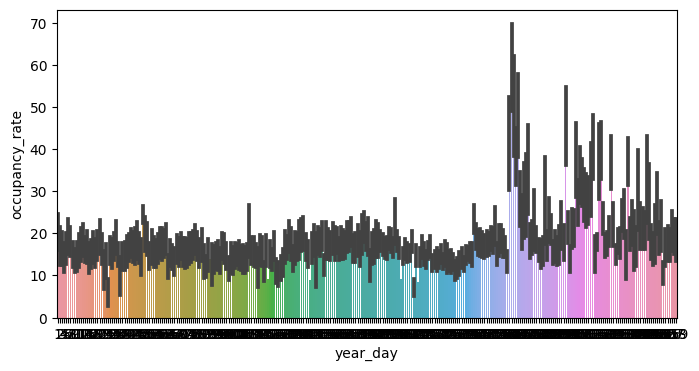

In [35]:
fig = plt.figure(figsize = (8,4))
sns.barplot(x = champs_with_meteo.year_day,  y=champs_with_meteo.occupancy_rate)

In [36]:
(champs_with_meteo.isna().sum()/champs_with_meteo.shape[0]*100).sort_values(ascending = False)

rain              66.840890
atm_pressure      66.828735
wind_speed        66.828735
temp              66.828735
humidity          66.828735
occupancy_rate     2.868603
flow               2.661967
date               0.000000
hour               0.000000
month_day          0.000000
year_day           0.000000
week_day           0.000000
week               0.000000
month              0.000000
is_holiday         0.000000
dtype: float64

# Adding Market

In [37]:
markets.Localisation.unique()

array(['rue Lecourbe, coté pair, entre les rues Vasco-de-Gama et Leblanc',
       'terre-plein du cours de Vincennes, coté pair, entre le boulevard de Picpus et la rue du Docteur Arnold-Netter',
       'place Maubert',
       'terre-plein du boulevard Richard-Lenoir, entre les rues Amelot et Saint-Sabin',
       'place Constantin Brancousi',
       "place Django Reinhardt - Plateau de l'avenue de la Porte de Clignancourt entre la rue Binet et la Bretelle de sortie du Périphérique et rue Jean Henri Fabre",
       "avenue Daumesnil coté impair entre le boulevard Poniatowski et l'avenue du Général Bizot",
       'avenue Jean-Jaurès, sur le terre_plein, coté impair, entre la rue Adoilphe Mille et le n° 195',
       'Rue Jean Anouilh',
       'boulevard Lefebvre, coté impair, entre les rues Olivier-de-Serres et de Dantzig',
       "boulevard de l'Hôpital, du 44 au 48",
       'rue de Crimée, coté pair, entre les n° 236 et 246',
       'terre-plein du boulevard de Charonne entre le n° 131 du

In [38]:
markets_champs = markets[markets['Localisation'].str.contains('Elysées', na=False)]
markets_champs

,Nom court,Localisation,Produit,Arrondissement,Jours de tenue,LUNDI,MARDI,MERCREDI,JEUDI,VENDREDI,SAMEDI,DIMANCHE,Secteur,Heure début en semaine,Heure fin en semaine,Heure début le samedi,Heure fin le samedi,Heure début le dimanche,Heure fin le dimanche


# Adding Chantier

In [39]:
chantiers_pertu.head()

,Code postal de l'arrondissement,Typologie,Objet,Voie(s),Date de début,Date de fin,Impact sur la circulation,Niveau de perturbation,Statut
0,75015,3,CONSTRUCTION_IMMEUBLE,Avenue de la Porte de Brancion,2022-11-14,2024-03-15,RESTREINTE,2.0,2
1,75008,1,REFECTION_CHAUSSEE,Place du CANADA,2023-04-06,2023-05-05,RESTREINTE,1.0,2
2,75007,1,REAMENAGEMENT_VOIRIE,Pont IENA,2022-11-14,2022-12-30,RESTREINTE,1.0,2
3,75015,1,REAMENAGEMENT_VOIRIE,rue des Morillons,2023-07-31,2023-08-25,SENS_UNIQUE,2.0,2
4,75008,3,REHABILITATION_IMMEUBLE,Rue Galilée,2021-02-11,2023-03-31,RESTREINTE,2.0,2


In [40]:
chantiers_pertu_champs = chantiers_pertu[chantiers_pertu['Voie(s)'].str.contains('Elysées', na=False)]
chantiers_pertu_champs

,Code postal de l'arrondissement,Typologie,Objet,Voie(s),Date de début,Date de fin,Impact sur la circulation,Niveau de perturbation,Statut
7,75008,1,REAMENAGEMENT_VOIRIE,Avenue des Champs Elysées,2022-11-03,2023-04-14,RESTREINTE,2.0,2
48,75008,2,TRAVAUX_OUVRAGE,Avenue des Champs Elysées,2023-02-27,2023-04-28,RESTREINTE,2.0,2


In [41]:
chantiers_pertu_champs['Date de début'] = to_datetime(chantiers_pertu_champs['Date de début'])
chantiers_pertu_champs['Date de fin'] = to_datetime(chantiers_pertu_champs['Date de fin'])

# Liste pour stocker les nouvelles lignes
nouvelles_lignes = []

for index, row in chantiers_pertu_champs.iterrows():
    # Générer une série de dates pour chaque période de vacances
    date_range = pd.date_range(start=row['Date de début'], end=row['Date de fin'], freq='H')
    
    # Créer une nouvelle ligne pour chaque date
    for date in date_range:
        new_row = row.to_dict()
        new_row['Date de début'] = date
        nouvelles_lignes.append(new_row)

# Créer le nouveau DataFrame
chantiers_pertu_champs_process = pd.DataFrame(nouvelles_lignes)

chantiers_pertu_champs_process.head()

/var/folders/dj/drqjc_c134xgs5ns31syhsm40000gn/T/ipykernel_78897/2282725818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chantiers_pertu_champs['Date de début'] = to_datetime(chantiers_pertu_champs['Date de début'])
/var/folders/dj/drqjc_c134xgs5ns31syhsm40000gn/T/ipykernel_78897/2282725818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chantiers_pertu_champs['Date de fin'] = to_datetime(chantiers_pertu_champs['Date de fin'])


,Code postal de l'arrondissement,Typologie,Objet,Voie(s),Date de début,Date de fin,Impact sur la circulation,Niveau de perturbation,Statut
0,75008,1,REAMENAGEMENT_VOIRIE,Avenue des Champs Elysées,2022-11-03 00:00:00,2023-04-14,RESTREINTE,2.0,2
1,75008,1,REAMENAGEMENT_VOIRIE,Avenue des Champs Elysées,2022-11-03 01:00:00,2023-04-14,RESTREINTE,2.0,2
2,75008,1,REAMENAGEMENT_VOIRIE,Avenue des Champs Elysées,2022-11-03 02:00:00,2023-04-14,RESTREINTE,2.0,2
3,75008,1,REAMENAGEMENT_VOIRIE,Avenue des Champs Elysées,2022-11-03 03:00:00,2023-04-14,RESTREINTE,2.0,2
4,75008,1,REAMENAGEMENT_VOIRIE,Avenue des Champs Elysées,2022-11-03 04:00:00,2023-04-14,RESTREINTE,2.0,2


In [42]:
col_to_delete= [
    "Voie(s)",
    "Code postal de l'arrondissement", 
    "Typologie", 
    "Objet", 
    "Date de fin", 
    "Statut", 
    "Impact sur la circulation"
]
chantiers_pertu_champs_process = chantiers_pertu_champs_process.drop(columns=col_to_delete)

chantiers_pertu_champs_process

,Date de début,Niveau de perturbation
0,2022-11-03 00:00:00,2.0
1,2022-11-03 01:00:00,2.0
2,2022-11-03 02:00:00,2.0
3,2022-11-03 03:00:00,2.0
4,2022-11-03 04:00:00,2.0
...,...,...
5325,2023-04-27 20:00:00,2.0
5326,2023-04-27 21:00:00,2.0
5327,2023-04-27 22:00:00,2.0
5328,2023-04-27 23:00:00,2.0


In [43]:
chantiers_pertu_champs_process = chantiers_pertu_champs_process.rename(columns={'Date de début': 'date', "Niveau de perturbation": "perturbation_level"})

In [44]:
chantiers_pertu_champs_process.dtypes

date                  datetime64[ns]
perturbation_level           float64
dtype: object

In [45]:
champs_with_meteo['date'] =  to_datetime(champs_with_meteo['date'], utc=True)
chantiers_pertu_champs_process['date'] = to_datetime(chantiers_pertu_champs_process['date'], utc=True)
champs_with_meteo.dtypes

date              datetime64[ns, UTC]
flow                          float64
occupancy_rate                float64
hour                            int32
month_day                       int32
year_day                        int64
week_day                        int32
week                           UInt32
month                           int32
is_holiday                      int64
atm_pressure                  float64
wind_speed                    float64
temp                          float64
humidity                      float64
rain                          float64
dtype: object

In [46]:
champs_with_pertu = champs_with_meteo.merge(chantiers_pertu_champs_process, on = "date", how = "left")

In [47]:
champs_with_pertu

,date,flow,occupancy_rate,hour,month_day,year_day,week_day,week,month,is_holiday,atm_pressure,wind_speed,temp,humidity,rain,perturbation_level
0,2022-11-01 03:00:00+00:00,672.0,8.89223,3,1,305,1,44,11,1,100460.0,5.2,12.3,76.0,0.0,NaN
1,2022-11-01 04:00:00+00:00,513.0,7.12889,4,1,305,1,44,11,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-01 05:00:00+00:00,494.0,6.22500,5,1,305,1,44,11,1,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-01 06:00:00+00:00,513.0,5.80723,6,1,305,1,44,11,1,100720.0,3.6,10.5,87.0,0.0,NaN
4,2022-11-01 07:00:00+00:00,484.0,5.57111,7,1,305,1,44,11,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,2023-12-01 19:00:00+00:00,1430.0,53.45889,19,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN,NaN
9067,2023-12-01 20:00:00+00:00,1480.0,43.57389,20,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN,NaN
9068,2023-12-01 21:00:00+00:00,1421.0,53.80111,21,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN,NaN
9069,2023-12-01 22:00:00+00:00,1410.0,51.92889,22,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN,NaN


# Adding Events

In [48]:
events

,Date de début,Date de fin,Mots clés,Adresse du lieu,Ville
0,2021-12-18T11:00:21+01:00,2023-12-31T19:00:21+01:00,Expo,36 rue Geoffroy Saint-Hilaire,Paris
1,2021-12-23T21:30:19+01:00,2023-12-22T23:00:00+01:00,"Concert,Musique",Place Saint-Sulpice,Paris
2,2023-12-13T21:30:00+01:00,2023-12-13T23:00:00+01:00,"Concert,Musique",124 avenue de la République,Paris
3,2024-03-28T21:30:00+01:00,2024-03-28T23:55:00+01:00,Concert,2 rue du président G.Pompidou,Sannois
4,2023-12-09T21:30:00+01:00,2023-12-09T23:55:00+01:00,Concert,2 rue du président G.Pompidou,Sannois
...,...,...,...,...,...
2224,2024-01-16T20:00:00+01:00,2024-01-16T21:30:00+01:00,Conférence,72 avenue Félix Faure,Paris
2225,2023-12-02T11:00:00+01:00,2023-12-03T19:00:00+01:00,Gourmand,Rue Saint-Charles,Paris
2226,2023-09-09T19:00:00+02:00,2024-07-06T20:00:00+02:00,"Enfants,Loisirs",1 rue Reynaldo Hahn,Paris
2227,2024-03-28T21:00:00+01:00,2024-03-28T22:20:00+01:00,Musique,21 A Bd Jourdan,Paris


In [49]:
event_champs = events[(events.Ville == 'Paris') & (events['Adresse du lieu'].str.contains('Elysées', na=False))]
event_champs

,Date de début,Date de fin,Mots clés,Adresse du lieu,Ville
497,2023-12-07T01:00:00+01:00,2024-02-26T00:59:59+01:00,"Art contemporain,Expo,Loisirs",2 ème étage de la Maison du Danemark: 142 Ave...,Paris


In [50]:
event_champs['Date de début'] = to_datetime(event_champs['Date de début'])
event_champs['Date de fin'] = to_datetime(event_champs['Date de fin'])

# Liste pour stocker les nouvelles lignes
nouvelles_lignes = []

for index, row in event_champs.iterrows():
    # Générer une série de dates pour chaque période de vacances
    date_range = pd.date_range(start=row['Date de début'], end=row['Date de fin'], freq='H')
    
    # Créer une nouvelle ligne pour chaque date
    for date in date_range:
        new_row = row.to_dict()
        new_row['Date de début'] = date
        nouvelles_lignes.append(new_row)

# Créer le nouveau DataFrame
event_champs_process = pd.DataFrame(nouvelles_lignes)

event_champs_process.head()

/var/folders/dj/drqjc_c134xgs5ns31syhsm40000gn/T/ipykernel_78897/559147626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_champs['Date de début'] = to_datetime(event_champs['Date de début'])
/var/folders/dj/drqjc_c134xgs5ns31syhsm40000gn/T/ipykernel_78897/559147626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_champs['Date de fin'] = to_datetime(event_champs['Date de fin'])


,Date de début,Date de fin,Mots clés,Adresse du lieu,Ville
0,2023-12-07 01:00:00+01:00,2024-02-26 00:59:59+01:00,"Art contemporain,Expo,Loisirs",2 ème étage de la Maison du Danemark: 142 Ave...,Paris
1,2023-12-07 02:00:00+01:00,2024-02-26 00:59:59+01:00,"Art contemporain,Expo,Loisirs",2 ème étage de la Maison du Danemark: 142 Ave...,Paris
2,2023-12-07 03:00:00+01:00,2024-02-26 00:59:59+01:00,"Art contemporain,Expo,Loisirs",2 ème étage de la Maison du Danemark: 142 Ave...,Paris
3,2023-12-07 04:00:00+01:00,2024-02-26 00:59:59+01:00,"Art contemporain,Expo,Loisirs",2 ème étage de la Maison du Danemark: 142 Ave...,Paris
4,2023-12-07 05:00:00+01:00,2024-02-26 00:59:59+01:00,"Art contemporain,Expo,Loisirs",2 ème étage de la Maison du Danemark: 142 Ave...,Paris


In [51]:
col_to_rename={
    'Date de début':'date',
    'Mots clés':'event_description'
}
col_to_delete = ['Date de fin', 'Adresse du lieu', 'Ville']

event_champs_process = event_champs_process.rename(columns=col_to_rename)
event_champs_process = event_champs_process.drop(columns=col_to_delete)


In [52]:
event_champs_process['is event'] = 1
event_champs_process

,date,event_description,is event
0,2023-12-07 01:00:00+01:00,"Art contemporain,Expo,Loisirs",1
1,2023-12-07 02:00:00+01:00,"Art contemporain,Expo,Loisirs",1
2,2023-12-07 03:00:00+01:00,"Art contemporain,Expo,Loisirs",1
3,2023-12-07 04:00:00+01:00,"Art contemporain,Expo,Loisirs",1
4,2023-12-07 05:00:00+01:00,"Art contemporain,Expo,Loisirs",1
...,...,...,...
1939,2024-02-25 20:00:00+01:00,"Art contemporain,Expo,Loisirs",1
1940,2024-02-25 21:00:00+01:00,"Art contemporain,Expo,Loisirs",1
1941,2024-02-25 22:00:00+01:00,"Art contemporain,Expo,Loisirs",1
1942,2024-02-25 23:00:00+01:00,"Art contemporain,Expo,Loisirs",1


In [53]:
champs_with_event = champs_with_pertu.merge(event_champs_process, on = "date", how = "left")
champs_with_event

,date,flow,occupancy_rate,hour,month_day,year_day,week_day,week,month,is_holiday,atm_pressure,wind_speed,temp,humidity,rain,perturbation_level,event_description,is event
0,2022-11-01 03:00:00+00:00,672.0,8.89223,3,1,305,1,44,11,1,100460.0,5.2,12.3,76.0,0.0,NaN,NaN,NaN
1,2022-11-01 04:00:00+00:00,513.0,7.12889,4,1,305,1,44,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-01 05:00:00+00:00,494.0,6.22500,5,1,305,1,44,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-01 06:00:00+00:00,513.0,5.80723,6,1,305,1,44,11,1,100720.0,3.6,10.5,87.0,0.0,NaN,NaN,NaN
4,2022-11-01 07:00:00+00:00,484.0,5.57111,7,1,305,1,44,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,2023-12-01 19:00:00+00:00,1430.0,53.45889,19,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9067,2023-12-01 20:00:00+00:00,1480.0,43.57389,20,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9068,2023-12-01 21:00:00+00:00,1421.0,53.80111,21,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9069,2023-12-01 22:00:00+00:00,1410.0,51.92889,22,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
champs_with_event['is event'] = champs_with_event['is event'].fillna(0)
champs_with_event['perturbation_level'] = champs_with_event['perturbation_level'].fillna(0)

In [55]:
champs_with_event

,date,flow,occupancy_rate,hour,month_day,year_day,week_day,week,month,is_holiday,atm_pressure,wind_speed,temp,humidity,rain,perturbation_level,event_description,is event
0,2022-11-01 03:00:00+00:00,672.0,8.89223,3,1,305,1,44,11,1,100460.0,5.2,12.3,76.0,0.0,0.0,NaN,0.0
1,2022-11-01 04:00:00+00:00,513.0,7.12889,4,1,305,1,44,11,1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2,2022-11-01 05:00:00+00:00,494.0,6.22500,5,1,305,1,44,11,1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
3,2022-11-01 06:00:00+00:00,513.0,5.80723,6,1,305,1,44,11,1,100720.0,3.6,10.5,87.0,0.0,0.0,NaN,0.0
4,2022-11-01 07:00:00+00:00,484.0,5.57111,7,1,305,1,44,11,1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,2023-12-01 19:00:00+00:00,1430.0,53.45889,19,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
9067,2023-12-01 20:00:00+00:00,1480.0,43.57389,20,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
9068,2023-12-01 21:00:00+00:00,1421.0,53.80111,21,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
9069,2023-12-01 22:00:00+00:00,1410.0,51.92889,22,1,335,4,48,12,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0


,name,type,@timestamp
0,Champs-Elysées Montaigne,boundary,2016-07-26T14:10:50Z
1,Saint-Emilion Bibliothèque,boundary,2016-07-26T17:06:41Z
2,Saint-Germain,boundary,2016-07-26T17:30:29Z
3,Haussmann,multipolygon,2016-07-26T17:22:16Z
4,Saint-Honoré - Vendôme,boundary,2016-07-26T17:22:16Z
5,Maillot-Ternes,boundary,2016-07-26T15:53:40Z
6,Montmartre,boundary,2016-07-26T16:15:57Z
7,Rennes - Saint-Sulpice,boundary,2016-07-26T17:30:29Z
8,Olympiades,boundary,2016-07-26T16:39:02Z
9,Les Halles,boundary,2016-07-26T17:22:16Z


# Modeling Champs Elysée

In [14]:
champs_debit = champs[['Date et heure de comptage', 'Débit horaire']].set_index('Date et heure de comptage')
champs_occupation = champs[['Date et heure de comptage', "Taux d'occupation"]].set_index('Date et heure de comptage')
champs_debit = champs_debit.dropna()
champs_occupation = champs_occupation.dropna()
champs_debit

,Débit horaire
Date et heure de comptage,
2022-11-01T04:00:00+01:00,672.0
2022-11-01T05:00:00+01:00,513.0
2022-11-01T06:00:00+01:00,494.0
2022-11-01T07:00:00+01:00,513.0
2022-11-01T08:00:00+01:00,484.0
...,...
2023-11-30T20:00:00+01:00,1433.0
2023-11-30T21:00:00+01:00,1253.0
2023-11-30T22:00:00+01:00,1069.0


In [15]:
champs_debit.isna().sum()

Débit horaire    0
dtype: int64

## Check for Stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller

def ad_test(df):
    dftest = adfuller(df, autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("1. p-value : ", dftest[1])

ad_test(champs_debit['Débit horaire'])

1. ADF :  -8.8126315360534
1. p-value :  1.9724297755227684e-14


## Check order of the ARIMA Model

In [17]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [18]:
stepwise_fit = auto_arima(champs_debit['Débit horaire'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=117140.315, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=115811.612, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=115995.507, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=117138.316, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=115811.984, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=115812.611, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=115807.631, Time=2.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.73 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=115756.087, Time=0.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=115756.934, Time=0.99 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=115750.504, Time=2.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=115753.249, Time=1.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=114351.867, Time=4.06 sec
 ARIMA(3,1,3)(0,0,0

KeyboardInterrupt: 

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9047
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -57138.020
Date:                Sat, 02 Dec 2023   AIC                         114288.041
Time:                        16:32:41   BIC                         114330.701
Sample:                             0   HQIC                        114302.553
                               - 9047                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0849      0.015    140.631      0.000       2.056       2.114
ar.L2         -1.3914      0.024    -58.050      0.000      -1.438      -1.344
ar.L3          0.2600      0.012     22.061      0.000       0.237       0.283
ma.L1         -1.8748      0.011   -176.329      0.000      -1.896      -1.854
ma.L2          0.8817      0.010     84.019      0.000       0.861       0.902
sigma2      1.794e+04    196.441     91.306      0.000    1.76e+04    1.83e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              1986.66
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
print(champs_debit.shape)

train = champs_debit[:-1000]
test = champs_debit[-1000:]

(9047, 1)


In [25]:
model = ARIMA(train['Débit horaire'], order=(3,1,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Débit horaire   No. Observations:                 8047
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -50460.316
Date:                Sat, 02 Dec 2023   AIC                         100932.632
Time:                        16:43:06   BIC                         100974.589
Sample:                             0   HQIC                        100946.989
                               - 8047                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1221      0.015    138.388      0.000       2.092       2.152
ar.L2         -1.4589      0.025    -58.334      0.000      -1.508      -1.410
ar.L3          0.2922      0.012     23.678      0.000       0.268       0.316
ma.L1         -1.8773      0.011   -170.558      0.000      -1.899      -1.856
ma.L2          0.8845      0.011     81.492      0.000       0.863       0.906
sigma2       1.64e+04    192.196     85.306      0.000     1.6e+04    1.68e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1445.53
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
start = len(train)
end = len(train) + len(test) -1
pred = model.predict(start=start, end=end, typ='levels')
pred.index = champs_debit.index[start:end+1]
print(pred)

Date et heure de comptage
2023-10-19T17:00:00+02:00    1146.151997
2023-10-19T18:00:00+02:00    1112.804528
2023-10-19T19:00:00+02:00    1074.243161
2023-10-19T20:00:00+02:00    1039.939743
2023-10-19T21:00:00+02:00    1013.658788
                                ...     
2023-11-30T20:00:00+01:00    1095.358009
2023-11-30T21:00:00+01:00    1095.358009
2023-11-30T22:00:00+01:00    1095.358009
2023-11-30T23:00:00+01:00    1095.358009
2023-12-01T00:00:00+01:00    1095.358009
Name: predicted_mean, Length: 1000, dtype: float64


<Axes: xlabel='Date et heure de comptage'>

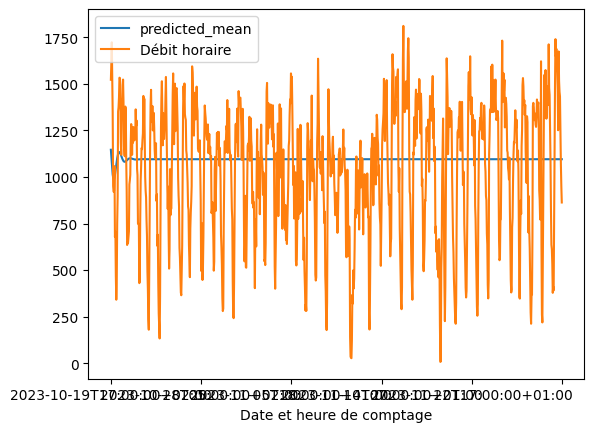

In [27]:
pred.plot(legend=True)
test['Débit horaire'].plot(legend=True)

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred, test['Débit horaire']))
print(rmse)

362.3978672843938


In [29]:
test['Débit horaire'].mean()
# 30% error with ARIMA very BAD !!

1030.746

# Try Prophet FB

In [35]:
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet 

ModuleNotFoundError: No module named 'fbprophet'

In [34]:
pip install fbprophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached ephem-4.1.5-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.0 kB)
  Using cached aiohttp-3.9.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (7.4 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl 